# Projekt Eksploracja Dancyh

Przykładowy zbiór danych zawiera listę artykułów z przydzielonymi kategoraimi. Głównym problemem jest klasyfikacja danych ze względu na kategorię artykułu.

In [5]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

Wczytanie zbioru danych:

In [6]:
news = pd.read_csv('uci-news-aggregator.csv', sep=',')

Wielkość zbioru:

In [30]:
news.shape

(422419, 13)

Przydzielenie atrybutów do kategorii:

In [7]:
news.CATEGORY = news['CATEGORY'].astype("category",)
news.PUBLISHER = news['PUBLISHER'].astype("category")
news.TITLE = news['TITLE'].astype("category")
news.URL = news['URL'].astype("category")
news.STORY = news['STORY'].astype("category")
news.HOSTNAME = news['HOSTNAME'].astype("category")

news_codes = pd.DataFrame(data=[news.CATEGORY.cat.codes, news.PUBLISHER.cat.codes], columns=["CATEGORY_CODE", "PUBLISHER_CODE"])
#news["CATEGORY_CODE"] = news.CATEGORY.cat.codes
news["PUBLISHER_CODE"] = news.PUBLISHER.cat.codes
news["TITLE_CODE"] = news.TITLE.cat.codes
news["URL_CODE"] = news.URL.cat.codes
news["STORY_CODE"] = news.STORY.cat.codes
news["HOSTNAME_CODE"] = news.HOSTNAME.cat.codes




Wielkość zbioru

,CATEGORY_CODE,PUBLISHER_CODE
0,NaN,NaN
1,NaN,NaN


Typy zmiennych:

In [27]:
news.dtypes

ID                   int64
TITLE             category
URL               category
PUBLISHER         category
CATEGORY          category
STORY             category
HOSTNAME          category
TIMESTAMP            int64
PUBLISHER_CODE       int16
TITLE_CODE           int32
URL_CODE             int32
STORY_CODE           int16
HOSTNAME_CODE        int16
dtype: object

Liczba klas:

In [25]:
klasy = np.unique(news.CATEGORY)
print (klasy)
print (len(klasy))

['b' 'e' 'm' 't']
4


Lista atrybutów:

In [16]:
print (news.columns)

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')


Rozmiary poszczególnych kategorii:

In [5]:
news.groupby("PUBLISHER").size()

PUBLISHER
100.7 WZLX Classic Rock                                  13
1011now                                                  25
106 JACK fm                                               9
10News                                                  200
10TV                                                     83
1200 WOAI                                                11
1230 WBZT                                                 5
123Jump.com                                              32
123Macmini.com                                            5
12NewsNow.Com                                            53
1340 WGAU                                                19
1370 WSPD                                                18
13WHAM-TV                                                99
13WMAZ                                                   57
13abc Action News                                        46
14 News WFIE Evansville                                  64
148Apps                       

Parametry statystyczne dla poszczególnych kategorii:

In [33]:
news[news.CATEGORY =='b'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
count,115967.000000,115967,115967,115966,115967,115967,115967,1.159670e+05
unique,NaN,111903,115920,6419,1,2019,6430,1.159670e+05
top,NaN,Posted by Imaduddin,http://business.financialpost.com/2014/07/03/c...,Reuters,b,drWjpn6_UzSkmiM_9qWYJe3-LIGPM,in.reuters.com,1.404519e+12
freq,NaN,52,4,3157,115967,440,2286,1.000000e+00
mean,210544.533911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,122425.665139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,101845.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,211931.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,311176.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
news[news.CATEGORY =='e'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
count,152469.000000,152469,152469,152469,152469,152469,152469,1.524690e+05
unique,NaN,146952,152387,6612,1,2075,6639,1.524690e+05
top,NaN,The article requested cannot be found! Please ...,http://www.latimes.com/local/lanow/la-me-ln-ra...,Contactmusic.com,e,dXfATHLvmd9iCUMfMSU3nmTZuv34M,www.contactmusic.com,1.400765e+12
freq,NaN,130,4,2309,152469,387,2309,1.000000e+00
mean,211261.873692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,121905.693181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2170.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,108956.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,210088.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,320453.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
news[news.CATEGORY =='m'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
count,45639.000000,45639,45639,45639,45639,45639,45639,4.563900e+04
unique,NaN,43719,45615,5098,1,1347,5147,4.563900e+04
top,NaN,Share this on:,http://www.japantimes.co.jp/news/2014/04/18/wo...,Headlines \& Global News,m,dRL3APAAYdKPwuMnih--zAQtflluM,www.hngn.com,1.405444e+12
freq,NaN,9,5,381,45639,293,381,1.000000e+00
mean,216210.545520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,124515.779549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4208.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,100603.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,219209.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,326432.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
news[news.CATEGORY =='t'].describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
count,108344.000000,108344,108344,108343,108344,108344,108344,1.083440e+05
unique,NaN,104733,108306,6223,1,1789,6211,1.083440e+05
top,NaN,Business Wire,http://www.bizjournals.com/sanantonio/blog/mor...,Tech Times,t,dubwcJArLL_qAKML5LGPLiunKzNLM,www.techtimes.com,1.402937e+12
freq,NaN,29,3,813,108344,450,813,1.000000e+00
mean,211016.861958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,120960.405488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,945.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,106123.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,213505.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,315876.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
news.describe(include='all')

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
count,422419.000000,422419,422419,422417,422419,422419,422419,4.224190e+05
unique,NaN,406455,422223,10985,4,7230,11236,4.224190e+05
top,NaN,The article requested cannot be found! Please ...,http://www.japantimes.co.jp/news/2014/04/18/wo...,Reuters,e,dubwcJArLL_qAKML5LGPLiunKzNLM,in.reuters.com,1.394600e+12
freq,NaN,145,5,3902,152469,450,2877,1.000000e+00
mean,211536.764594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,122102.839707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,105801.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,211655.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,317273.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Najwiecej jest próbek kategorii e

In [33]:
pearson_matrix = news.corr("spearman")
pearson_matrix

,ID,TIMESTAMP,PUBLISHER_CODE,TITLE_CODE,URL_CODE,STORY_CODE,HOSTNAME_CODE
ID,1.000000,1.000000,-0.005899,-0.006445,0.003386,-0.018402,-0.006655
TIMESTAMP,1.000000,1.000000,-0.005899,-0.006445,0.003386,-0.018402,-0.006655
PUBLISHER_CODE,-0.005899,-0.005899,1.000000,0.014325,0.438630,0.007897,0.406953
TITLE_CODE,-0.006445,-0.006445,0.014325,1.000000,0.003634,-0.010510,0.006766
URL_CODE,0.003386,0.003386,0.438630,0.003634,1.000000,0.006433,0.955509
STORY_CODE,-0.018402,-0.018402,0.007897,-0.010510,0.006433,1.000000,0.006572
HOSTNAME_CODE,-0.006655,-0.006655,0.406953,0.006766,0.955509,0.006572,1.000000


Wykres:

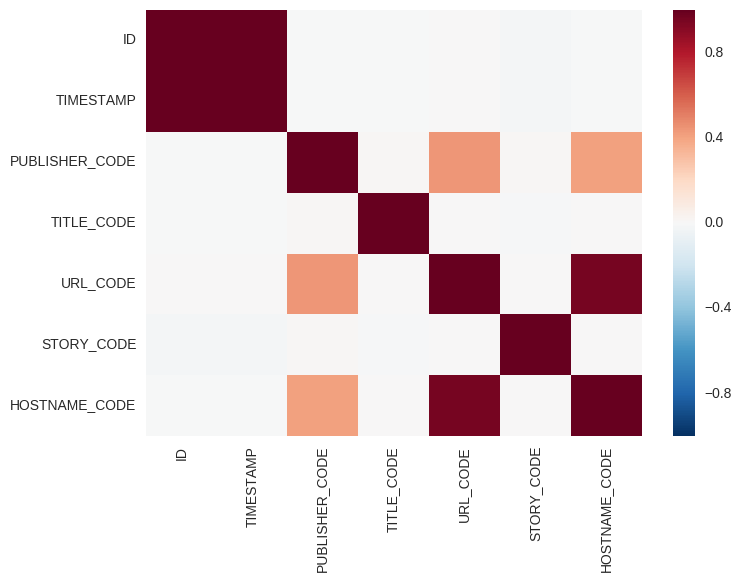

In [34]:
sns.heatmap(pearson_matrix)
sns.plt.show()

Wyrzucic niechciane atrybuty:

In [8]:
cechy = ['ID', 'PUBLISHER_CODE', 'TITLE_CODE', 'URL_CODE', 'STORY_CODE', 'CATEGORY']
news2 = news[cechy].copy()
news2

,ID,PUBLISHER_CODE,TITLE_CODE,URL_CODE,STORY_CODE,CATEGORY
0,1,5030,130205,265375,4568,b
1,2,4975,130369,271219,4568,b
2,3,3918,369751,238998,4568,b
3,4,3918,130249,238740,4568,b
4,5,5524,130446,283537,4568,b
5,6,5732,281933,291271,4568,b
6,7,5216,130448,275699,4568,b
7,8,2861,130439,210575,4568,b
8,9,2589,369403,25229,4568,b
9,10,4131,109958,239763,2949,b


# Klasyfikacja:

Metoda najbliższego sąsiada (k-NN)

In [27]:
# załadowanie odpowiednich modułów
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(news2.iloc[:,0:2], news2.CATEGORY, test_size=0.3, random_state=1)
print ('Dlugosc X_train: ', len(X_train))
print ('Dlugosc X_test: ', len(X_test))
print ('Dlugosc y_train: ', len(y_train))
print ('Dlugosc y_test: ', len(y_test))

Dlugosc X_train:  295693
Dlugosc X_test:  126726
Dlugosc y_train:  295693
Dlugosc y_test:  126726


Dobranie liczby sąsiadów poprzez analizę błędu klasyfikacji dla różnych wartości sąsiadów:

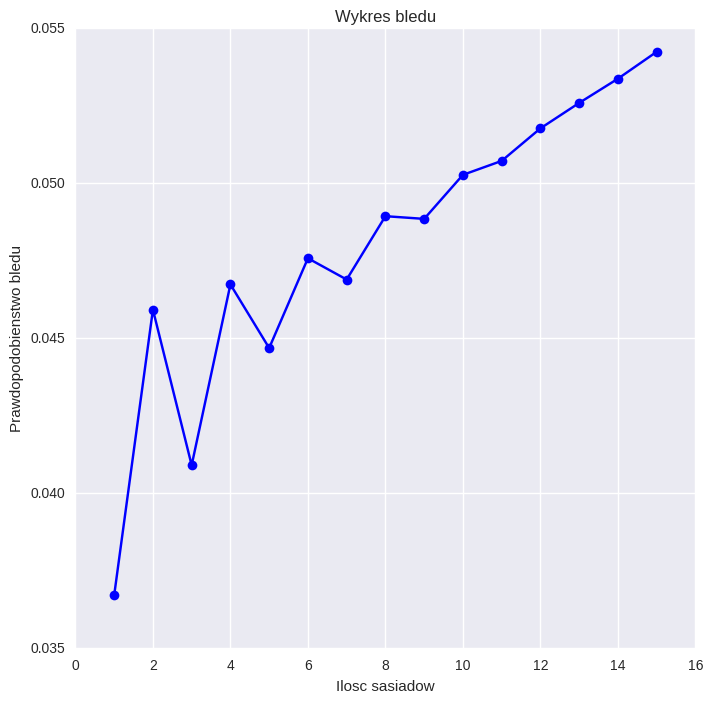

In [28]:
kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    rss_all[k-1] = 1 - model.score(X_test,y_test)
plt.figure(figsize=(8, 8))
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Ilosc sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

Z tego wynika że najlepsza liczba sąsiadów to 1.

In [29]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
knn_prediction = model.predict(X_test) 
print ("Trafność " + str(model.score(X_test,y_test) * 100) + "%")

Trafność 96.3290879535%
